### Regression Analysis using Linear Algebra and NumPy

## Regression analysis

By now, you know that the purpose of the regression process is to fit a mathematical model to a set of observed points, in order to later use that model for predicting new values e.g. predicting sales, based on historical sales figures, predicting house prices based on different features of the house, etc. 

Let's use a very simple toy example to understand how this works with linear algebra. Say you are collecting data on total number of sales per day for some business. Imagine you've got three data points in the format: 

(day, total number of sales(in hundreds)) 

> (1, 1) , (2, 2) , (3, 2)

If we plot these points on a scatter plot with day (x-axis) vs. sales figures (y-axis), this is what we get:


<function matplotlib.pyplot.show(close=None, block=None)>

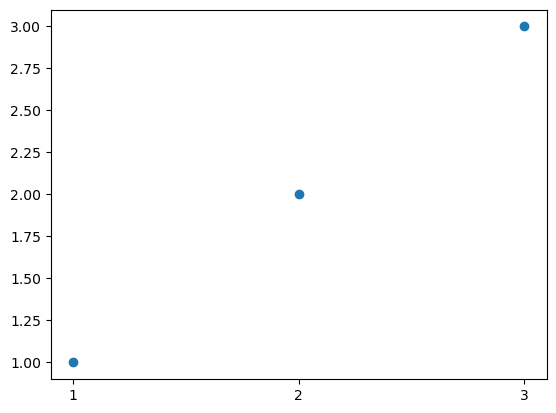

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,3])

plt.plot(x,y,'o')
plt.xticks(x)

plt.show

### Fitting a model to data
The purpose of linear regression would be to fit a mathematical model (a straight line) in the parameter space that best describes the relationship between day and sales. Simple linear regression attempts to fit a line (in a 2-dimensional space) to describe the relationship between two variables.


The purpose of linear regression would be to fit a mathematical model (a straight line) in the parameter space  that best describes the relationship between day and sales. Simple linear regression attempts to fit a line (in a 2-dimensional space) to describe the relationship between two variables.


Following this, if you were to identify a relationship between the day and total number of sales, the goal would be to seek a function that describes this line and allows us to linearly map input data points (day) or **independent variable** to outcome values (sales) or **dependent variable**.  If you do this, you first assume that there is an underlying relationship that maps “days” uniquely to “number of sales”, that can be written in the function form as an equation of the straight line i.e. 


$$y = mx+c$$


where $c$ is the intercept of the line and $m$ denotes the slope.



We can write the fitting function based on the above as sales being a **function** of days.

$$ \text{sales} = f(\text{days})$$


or, from $y= mx+c$

$$\text{sales} = \text{days}*x + \text{intercept} $$
>(where **y** is the number of sales per day and **x** represents the day. **c** (intercept) and **m** (slope) are the regression coefficients we are looking for hoping that these co-efficients will linearly map **day** to the **number of sales**). 

So using this, we can show our three data points ((1, 1) , (2, 2) , (3, 2)) as:

> $c + m*1 = 1$

> $c + m*2 = 2$

> $c + m*3 = 2$


We can see that our data points do not lie on a line. The first two points make a perfect linear system. When $x = 1$, $y = 1$; and when $x = 2$, $y = 2$ i.e. we can draw a straight line passing through these points. When x = 3, b = 2, you know the three points do not lie on the same line as first two points, and our model will be an **approximation** i.e. 
> there will be some error between the straight line and the REAL relationship between these parameters. 

This behavior can be simulated by using NumPy's `polyfit()` function (similar to `statsmodels.ols`) to draw a regression line to the data points as shown below. [Here is the documentation for np.polyfit()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html). 

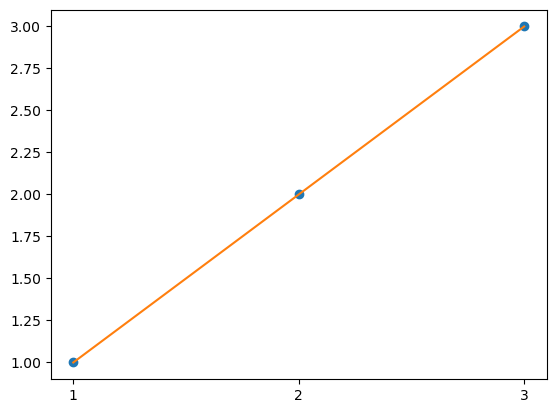

-3.845925372767128e-16 1.0000000000000004


In [3]:
from numpy.polynomial.polynomial import polyfit

c, m = polyfit(x, y, 1)

plt.plot(x, y, 'o')
plt.plot(x, c + (m*x), '-')
plt.xticks(x)

plt.show()
print(c, m)

In [4]:
X = np.array([[1, 1],[1, 2],[1, 3]])
y = np.array([1, 2, 2])
Xt = X.T
XtX = Xt.dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = Xt.dot(y)
x_hat = XtX_inv.dot(Xty) # the value for b shown above
x_hat

array([0.66666667, 0.5       ])

The solution gives an intercept of 0.6 and slope value 0.5. Let's see what you get if you draw a line with these values with given data:


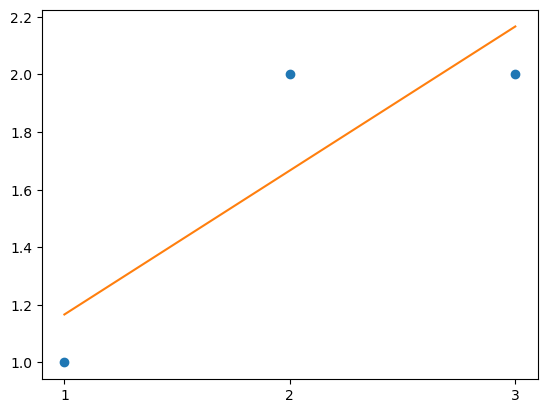

In [5]:
# Define data points
x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

# Plot the data points and line parameters calculated above
plt.plot(x, y, 'o')
plt.plot(x, x_hat[0] + (x_hat[1] * x), '-')
plt.xticks(x)

plt.show()

### Introduction to Derivatives

In the linear regression section, you learned about the basic notion of mathematical functions. Now, imagine that you used the number of bedrooms as a predictor and house rental price as the target variable, you can formulate this as follows:

price = f(number of bedrooms)

or, alternatively

y = f(x)

Now let's say the price of the apartment is set in a very simplified way, and there is a perfectly linear relationship between the apartment size and the rental price. Say that the price goes up by 500 USD/month for every bedroom an apartment has. In that case, we can express the price as follows:

price = 500*number of bedrooms

In [9]:
def f(x):
    return 500*x

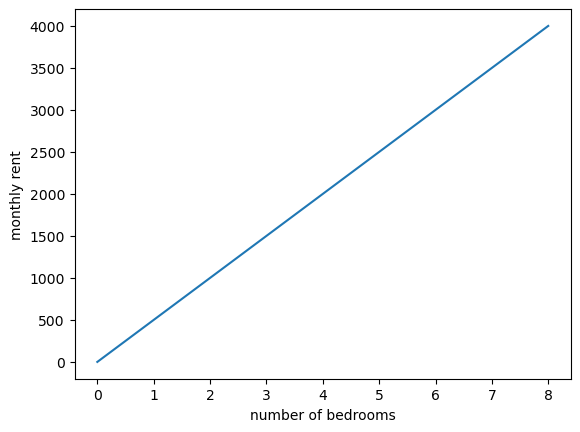

In [10]:
#using matplotlib you can visualize

x = np.linspace(0, 8, 100)

plt.plot(x, f(x))
plt.xlabel('number of bedrooms')
plt.ylabel('monthly rent')
plt.show();

 `Derivatives are important because they tell us how a function is changing at any given point.`
 
 calculating the derivatives of straight line functions, or linear functions like the function above,

Say that we want a function that represents a person taking a jog. We'll represent this by drawing the following straight line.

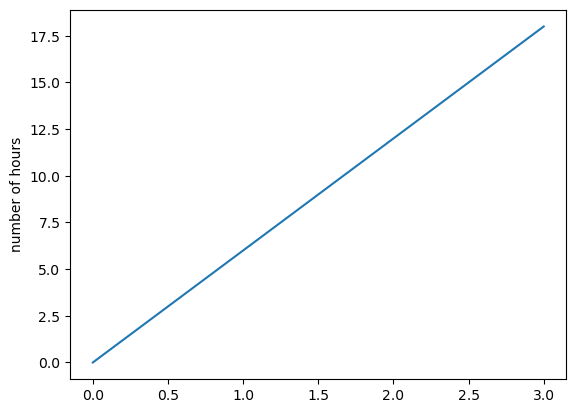

In [11]:
def jog(hours):
    return 6*hours

x = np.linspace(0, 3, 100)

plt.plot(x, jog(x))
plt.ylabel("distance in miles")
plt.ylabel("number of hours")
plt.show()

The graph above helps us see how distance changes in relation to time, or in other words speed. So here, when we ask about the rate of change (which is the core concept behind derivatives), we're basically asking how fast our is jogger traveling!

### Calculating the rate of change
To calculate the miles per hour we can see where a person is at a given time, then wait an hour and to see how far he traveled. Or we can wait two hours and divide distance traveled by two. Generally, our technique is to divide number of miles traveled by the number of hours passed. In this specific example, we'll imagine doing the following to calculate the speed at hour 1.

Start a stopwatch after one hour and note the distance at that hour

Then, let one hour elapse and mark down the distance at that next hour.

Finally, divide the difference in the distances by the elapsed time.

In the below graph, we begin to calculate the speed at the first hour.

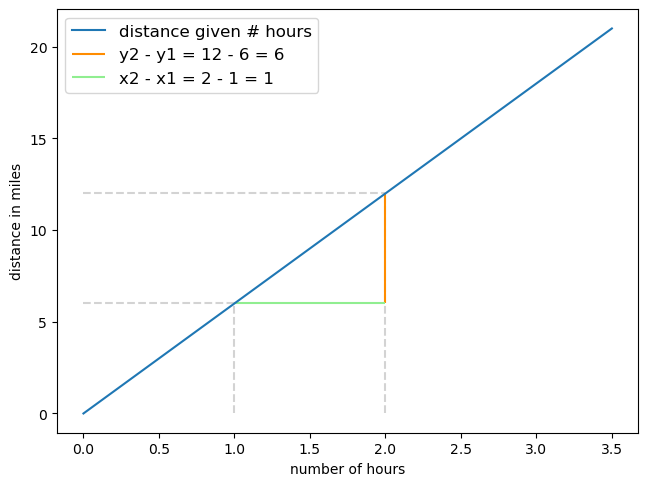

In [12]:
fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 3.5, 100)

plt.plot(x, jog(x), label = "distance given # hours")

plt.hlines(y=6, xmin=0, xmax=1, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=1, ymin=0, ymax=6, linestyle = "dashed", color= 'lightgrey')

plt.hlines(y=12, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=2, ymin=0, ymax=12, linestyle = "dashed", color= 'lightgrey')

plt.vlines(x=2, ymin=6, ymax=12, color="darkorange", label = "y2 - y1 = 12 - 6 = 6")
plt.hlines(y=6, xmin=1, xmax=2, color="lightgreen", label = "x2 - x1 = 2 - 1 = 1")
ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()